In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Step 1. Load data

In [25]:
df = pd.read_csv('../data/data_science_salaries.csv')
df.sample(4)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
5947,Data Analyst,Senior-level,Full-time,Remote,2022,United States,102100,USD,102100,United States,Medium
1169,Data Manager,Senior-level,Full-time,On-site,2023,United States,55200,USD,55200,United States,Medium
530,Data Analyst,Entry-level,Full-time,Remote,2024,United Kingdom,40000,GBP,50000,United Kingdom,Medium
2394,Business Intelligence Analyst,Senior-level,Full-time,On-site,2023,United States,90400,USD,90400,United States,Medium


<h2>Step 2. Clean data</h2>

We have imported the data and made a quick overview just to get an introduction to our dataframe.
Next we should prepare the data and clean things up a little.

In [26]:
print("--- Check for missing values ---")
print(df.isnull().sum())

print("--- Check for NaN values ---")
print(df.isna().sum())

print("--- Check for data types ---")
print(df.info())

--- Check for missing values ---
job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64
--- Check for NaN values ---
job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64
--- Check for data types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   wor

In [27]:
df.shape

(6599, 11)

So we can see that the data has no gaps (allegedly) and that we have strings and integers to work with in terms of datatypes.
Let us look at workyear to see what sort of time-frame we have (the range)

Let us now make a seperate dataframe of numerical values only, as we have many objects currently - afterwards we will also clean the data on the nominal dataframe so it says string rather than object.

In [28]:
df.drop(['employee_residence'], axis=1, inplace=True) # This column is not useful for our analysis and proves irrelevant
df.drop(['salary'], axis=1, inplace=True) # This column is redundant as we have another column explicitly in standardized USD
df.drop(['salary_currency'], axis=1, inplace=True) # This column is not useful for our analysis and proves irrelevant

In [29]:
dfNumeric = pd.get_dummies(df, columns=['job_title', 'experience_level', 'employment_type', 'work_models', 'company_location', 'company_size'], dtype=pd.Int64Dtype())
dfNumeric.head()
# Here we apply some one-hot encoding to the categorical columns to make them numeric so its easier to regress on them

,work_year,salary_in_usd,job_title_AI Architect,job_title_AI Developer,job_title_AI Engineer,job_title_AI Product Manager,job_title_AI Programmer,job_title_AI Research Engineer,job_title_AI Scientist,job_title_AWS Data Architect,...,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_Vietnam,company_size_Large,company_size_Medium,company_size_Small
0,2024,148100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2024,98700,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2024,140032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,2024,100022,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,2024,120000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [30]:
# lets convert all object types of columns into string type

for col in df:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('string')
df.dtypes

job_title           string[python]
experience_level    string[python]
employment_type     string[python]
work_models         string[python]
work_year                    int64
salary_in_usd                int64
company_location    string[python]
company_size        string[python]
dtype: object

<h2> Step 3. Explore data

The exploration does the following:

* Identifies timeframe

* Shows how we can prepare columns and change their values to be more standardized

* We show the salary destribution by country

In [31]:
min_work_year = df['work_year'].min()
max_work_year = df['work_year'].max()

print(f"The range of work years is from {min_work_year} to {max_work_year}.")


The range of work years is from 2020 to 2024.


And so we can see that we have a range of 2020-2024 (4 years) and that the format is a simple integer. 
As of right now this timeframe is not really anything special as there is too little time to derive any meaningful statistics, but perhaps it is too early to rule out potential in the data.

In [32]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

We can see that the data is already fairly standardized, but let us cast them to using "x-y" instead of "x_y" to demonstrate the possibility of preparing data

In [33]:
import gc

dfStan = df.copy()


dfStan.columns = [col.upper().replace('_', '-') for col in dfStan.columns]

print(dfStan.columns)

# This is simply to demonstrate the possibility
# let us now dump this newlycreated dataframe, as having underscores and lowercase looks better.

del dfStan

gc.collect()

Index(['JOB-TITLE', 'EXPERIENCE-LEVEL', 'EMPLOYMENT-TYPE', 'WORK-MODELS',
       'WORK-YEAR', 'SALARY-IN-USD', 'COMPANY-LOCATION', 'COMPANY-SIZE'],
      dtype='object')


5646

In [34]:
df[['work_year', 'salary_in_usd']].describe() # måske fjern ?

,work_year,salary_in_usd
count,6599.000000,6599.000000
mean,2022.818457,145560.558569
std,0.674809,70946.838070
min,2020.000000,15000.000000
25%,2023.000000,95000.000000
50%,2023.000000,138666.000000
75%,2023.000000,185000.000000
max,2024.000000,750000.000000


Lets start small with a basic historam to explore the nature of our salary data

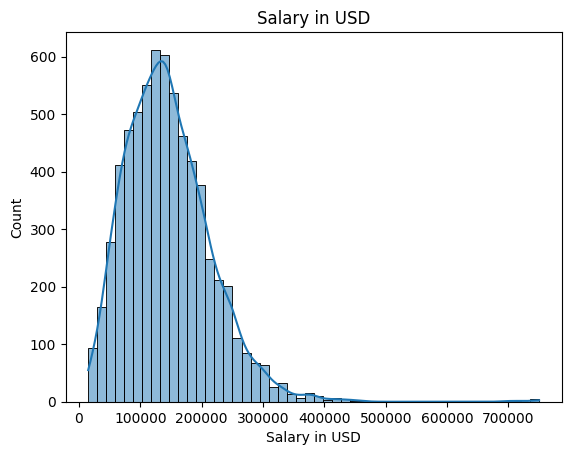

In [35]:
sns.histplot(df['salary_in_usd'], kde=True, bins=50)
plt.title('Salary in USD')
plt.ylabel('Count')
plt.xlabel('Salary in USD')
plt.show()

It seems we are dealing with a fine bell curve which means the nature of our graph is that of gaussian nature. We can also visually see some outliers which should be removed. Due to this we can use z-score technique to calculate what should be considered outliers.

In [36]:
import pandas as pd
import plotly.express as px


# Group by job_title and experience_level and calculate the average salary for each group
average_salary_per_group = df.groupby(['job_title', 'experience_level'], as_index=False)['salary_in_usd'].mean()

# input your info
input_data = pd.DataFrame({'job_title': ['Data Science Consultant'], 'experience_level': ['Entry-level']})

# Simillar to SQL left join, merge the input_data with the average_salary_per_group
input_data = input_data.merge(average_salary_per_group, on=['job_title', 'experience_level'], how='left')

# Create a function to assign salary ranges based on individual salary
def assign_salary_range(salary):
    if salary < 70000:
        return 'Low (<$70,000)'
    elif 70000 < salary <= 150000:
        return 'Medium ($70,000 - $150,000)'
    elif salary > 150000:
        return 'Very High (>$150,000)'

# Apply the function to create the 'salary_range' column (.apply() is a pandas method similar to using lambda)
input_data['salary_range'] = input_data['salary_in_usd'].apply(assign_salary_range)

print("Your Salary Range:", input_data['salary_range'].iloc[0])

# Plot the clusters using Plotly Express
fig = px.scatter(average_salary_per_group, 
                 x='salary_in_usd', 
                 y='experience_level', 
                 color='job_title',
                 size_max=20, 
                 labels={'salary_in_usd': 'Average Salary', 'experience_level': 'Experience Level'},
                 title='Clusters Based on Job Title, Experience Level, and Average Salary')

# Add a marker for the input_data
fig.add_trace(px.scatter(input_data, 
                         x='salary_in_usd', 
                         y='experience_level', 
                         color='job_title').data[0])


fig.show()


Your Salary Range: Low (<$70,000)


In [37]:
from datacleaner import get_numeric_df, combined_df
cluster_df = get_numeric_df(combined_df().drop(['gdp_per_capita'], axis=1))

X = cluster_df.values

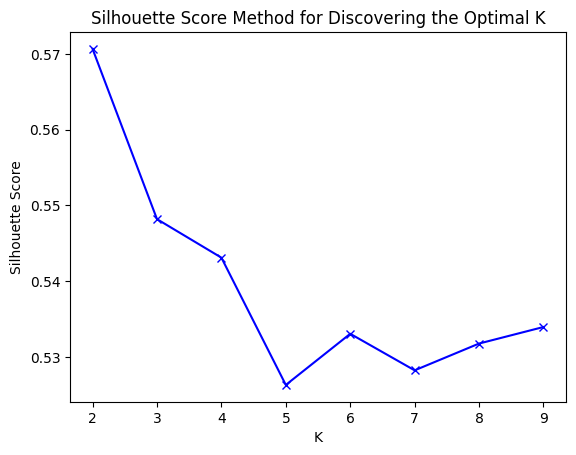

In [38]:
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

scores = []
for k in range(2, 10):
    model = KMeans(n_clusters=k, n_init=10).fit(X)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    scores.append(score)


plt.title('Silhouette Score Method for Discovering the Optimal K')
plt.plot(range(2,10), scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()



In [39]:
print ("The object type in the df is :")

print(cluster_df.dtypes)

The object type in the df is :
work_year                           int64
salary_in_usd                     float64
job_title_AI Architect              Int64
job_title_AI Developer              Int64
job_title_AI Engineer               Int64
                                   ...   
company_location_United States      Int64
company_location_Vietnam            Int64
company_size_Large                  Int64
company_size_Medium                 Int64
company_size_Small                  Int64
Length: 220, dtype: object


In [40]:
print(X.dtype)

object


In [41]:
from sklearn.cluster import KMeans

distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10).fit(X)
    model.fit(X)
    distortions.append(model.inertia_)
print("Distortion: ", distortions)

Distortion:  [9374832800318.268, 4606172646364.525, 2714816837134.6533, 1848354118870.8003, 1296727224450.2637, 956678380719.0596, 733093867505.5063, 589668888231.9943]


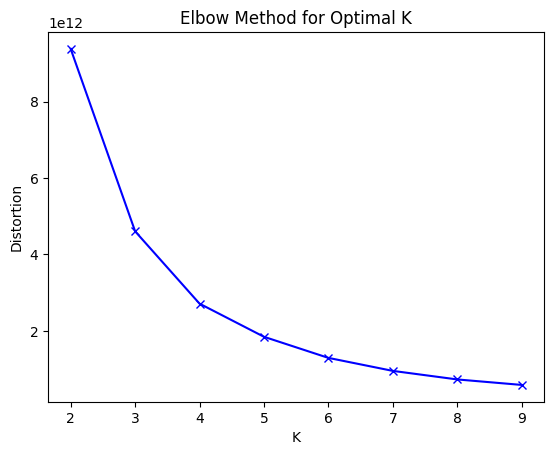

In [42]:
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [43]:
num_clusters = 9

kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10, random_state=42)

kmeans.fit(X)

KMeans(n_clusters=9, n_init=10, random_state=42)

In [44]:
y = kmeans.predict(X)
y

cluster_df['cluster'] = y

In [45]:
X.shape

(6556, 220)

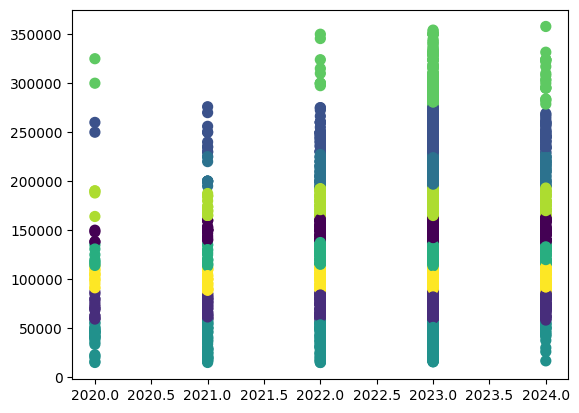

In [46]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='viridis')

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print(f'Silhouette Score: {score}')


Silhouette Score: 0.5337952471494595


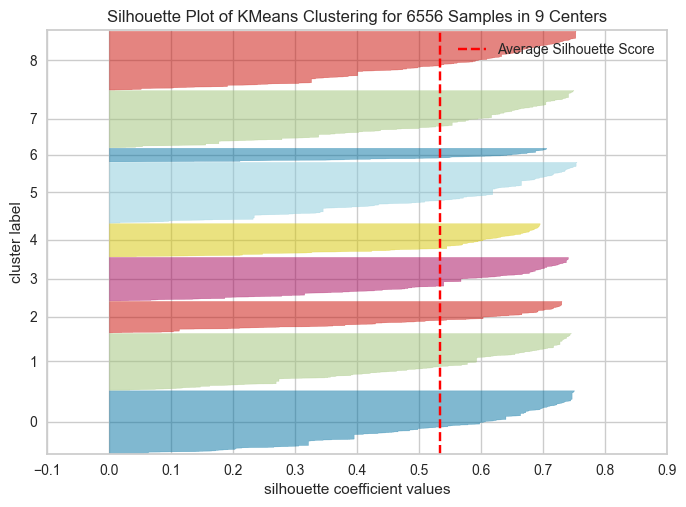

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 6556 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show() 

In [49]:
import plotly.express as px

# Lets firstly remove the outliers in salary_in_usd as there are values quadruple that of the average salary
import z_score
dfOutliers = df.copy()
dfOutliers['salary_in_usd'] = z_score.calculateList(df['salary_in_usd'], drop=True)
# Here we use z-Score, a method Magnus made (ik alt behøves være lavet i fælleskab xd) to remove the outliers in the salary column

hist_fig = px.histogram(dfOutliers, x='salary_in_usd', color='company_location',
                        title='Salary Distribution by Country',
                        labels={'salary_in_usd': 'Salary in USD', 'company_location': 'Country'},
                        template='plotly_white')

hist_fig.show()

The majority of salaries seem to be blue (USA) which indicates what country is dominant in this industry.

Interestingly enough, we see a lot of data from this here. We can derive the following points from this observation:

- Machine learning/Data engineering is held in very high regard
- On-site workmodel seems to fetch the highest salary, and this may be exclusive to US as all of the observations are in US
- This data might be from the same company and entry id 848 might be the same person as 296 - it is hardly something we can prove, but it is worth mentioning.

Lets draw parallel to denmark and see what the highest salaries for denmark were:

In [50]:
# Lets now print all the rows the company location is denmark

df[df['company_location'] == 'Denmark']

,job_title,experience_level,employment_type,work_models,work_year,salary_in_usd,company_location,company_size
4947,Power BI Developer,Mid-level,Full-time,Remote,2023,64781,Denmark,Large
6483,Computer Vision Software Engineer,Entry-level,Part-time,Hybrid,2021,19073,Denmark,Large
6484,Marketing Data Analyst,Senior-level,Full-time,Remote,2021,88654,Denmark,Large
6485,Computer Vision Engineer,Entry-level,Part-time,Hybrid,2021,28609,Denmark,Small
6585,AI Scientist,Entry-level,Full-time,Hybrid,2020,45896,Denmark,Small


In [51]:
# Lets now print all the rows the company location is denmark

df[df['company_location'] == 'Denmark'][['job_title', 'salary_in_usd']].describe()

,salary_in_usd
count,5.000000
mean,49402.600000
std,28025.534202
min,19073.000000
25%,28609.000000
50%,45896.000000
75%,64781.000000
max,88654.000000


Its very interesting to see how much disparity there is per anum between the US and Denmark.

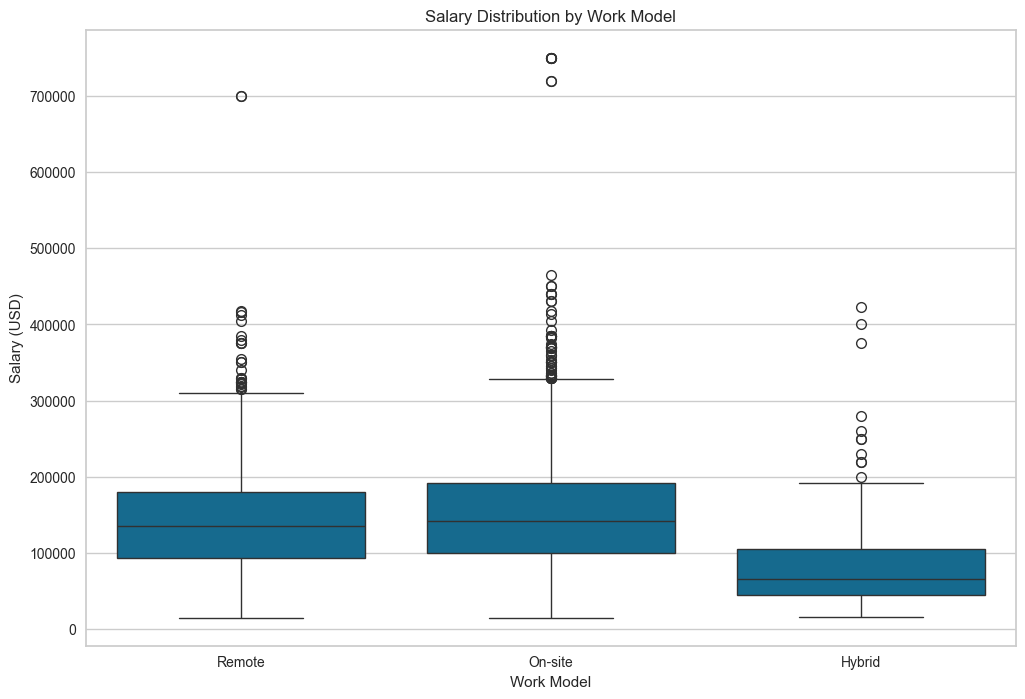

,count,mean,std,min,25%,50%,75%,max
work_models,,,,,,,,
Hybrid,225.0,83293.502222,61764.491896,15680.0,44753.0,66192.0,105066.0,423000.0
On-site,3813.0,152600.100970,72701.484514,15000.0,100000.0,142200.0,191765.0,750000.0
Remote,2561.0,140550.137837,65795.137323,15000.0,93000.0,136000.0,180000.0,700000.0


In [52]:
# We extract the relevant columns
work_salary_df = df[['work_models', 'salary_in_usd']]

# Boxplot to compare salary distribution for different work models
plt.figure(figsize=(12, 8))
sns.boxplot(x='work_models', y='salary_in_usd', data=work_salary_df)
plt.title('Salary Distribution by Work Model')
plt.xlabel('Work Model')
plt.ylabel('Salary (USD)')
plt.show()


# Summary statistics for each work model to compare solid values
summary_stats = work_salary_df.groupby('work_models')['salary_in_usd'].describe()
summary_stats


An interesting observation, it seems On-site gives the best pay while Remote comes in second. Surprisingly a hybrid variation of the job does the worst by far, having the average be almost half that of on-site. Even accounting for outliers, hybrid has far less compared to the other two, so overall it is apparent that Hybrid does the worst in terms of payout.

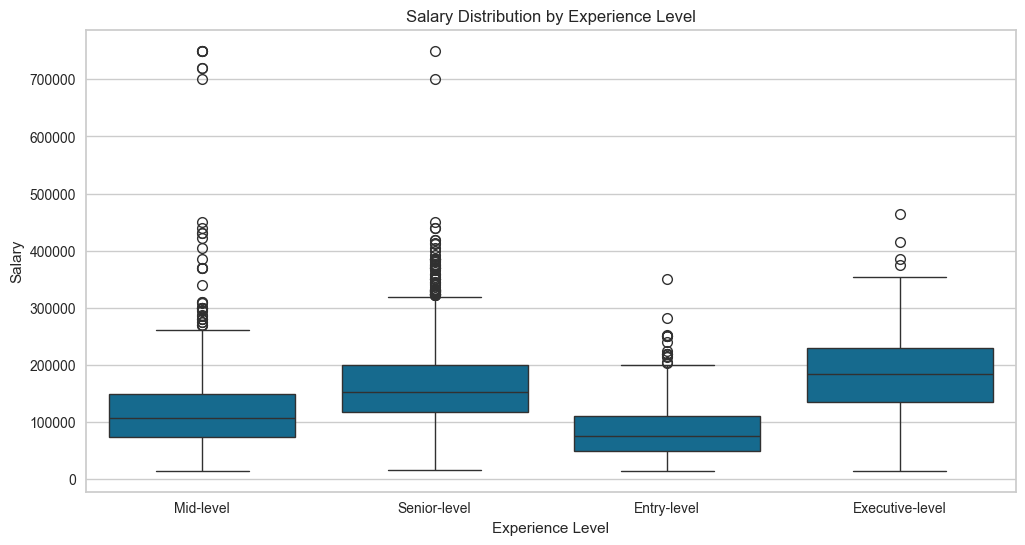

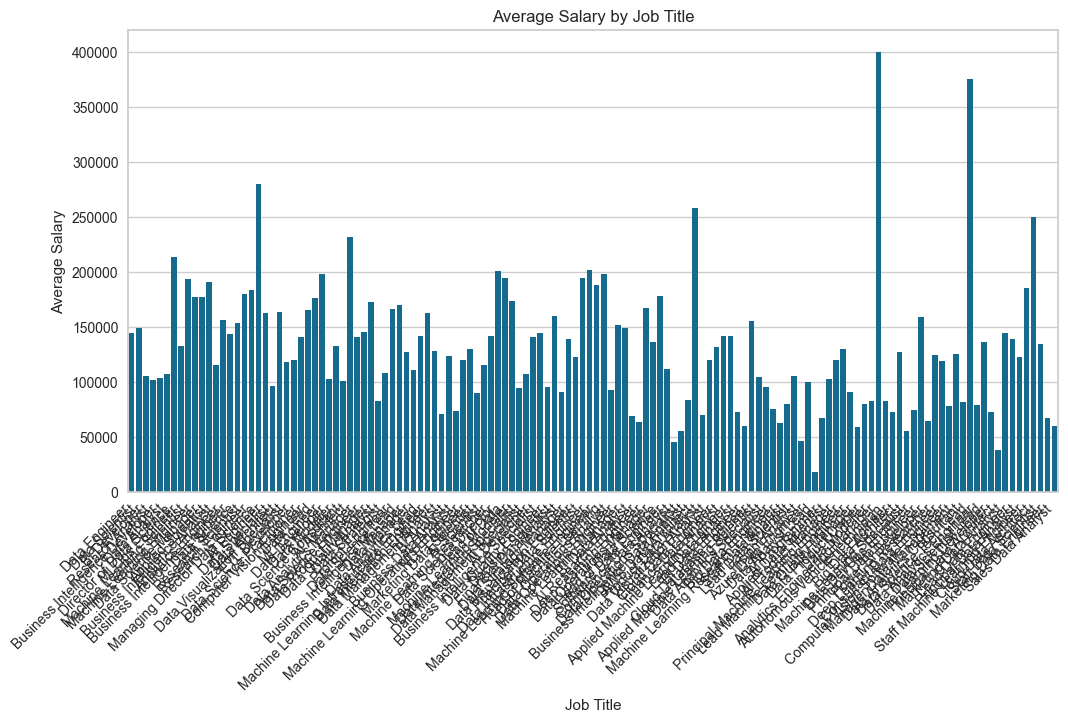

In [53]:

from matplotlib.ticker import ScalarFormatter


# Box Plot for Salary vs. Experience Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

# Bar Plot for Average Salary by Job Title
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title', y='salary_in_usd', data=df, errorbar=None)
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right', ) 
plt.show()


In [54]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,120000,United States,Medium


In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Make a copy of the original DataFrame
df_feat = df.copy()

# Preprocessing
# Convert categorical variables into numerical variables
le = LabelEncoder()
categorical_features = ['job_title', 'experience_level', 'employment_type', 'work_models', 'company_size']
for feature in categorical_features:
    df_feat[feature] = le.fit_transform(df_feat[feature])

# Clustering
# Filter data for your country (replace 'United States' with your country)
df_country = df_feat[df_feat['company_location'] == 'United States']

# Define features for clustering (you can modify this list based on your requirements)
features = ['job_title', 'experience_level', 'employment_type', 'work_models', 'salary_in_usd', 'company_size']

kmeans = KMeans(n_clusters=3, random_state=42)  # Define the model
df_country['cluster'] = kmeans.fit_predict(df_country[features])  # Fit the model and create a new column based on cluster results

# Classification
X = df_country[features]
y = df_country['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the data into training and testing sets

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  # Define the classifier
clf.fit(X_train, y_train)  # Train the classifier

# Prediction
y_pred = clf.predict(X_test)

# Check the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100}%')


Accuracy: 84.31372549019608%


C:\Users\magnu\AppData\Local\Temp\ipykernel_16132\1953931381.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
import plotly.express as px

# Assuming that 'job_title' and 'salary_in_usd' are the features you want to plot
fig = px.scatter(df_country, x='job_title', y='salary_in_usd', color='cluster')

fig.update_layout(
    title="Clusters Visualization",
    xaxis_title="Job Title",
    yaxis_title="Salary in USD",
    legend_title="Cluster",
)

fig.show()


The above graph is perhaps a good indicator for us, telling us that we should create clusters of our data ----- Mere text...

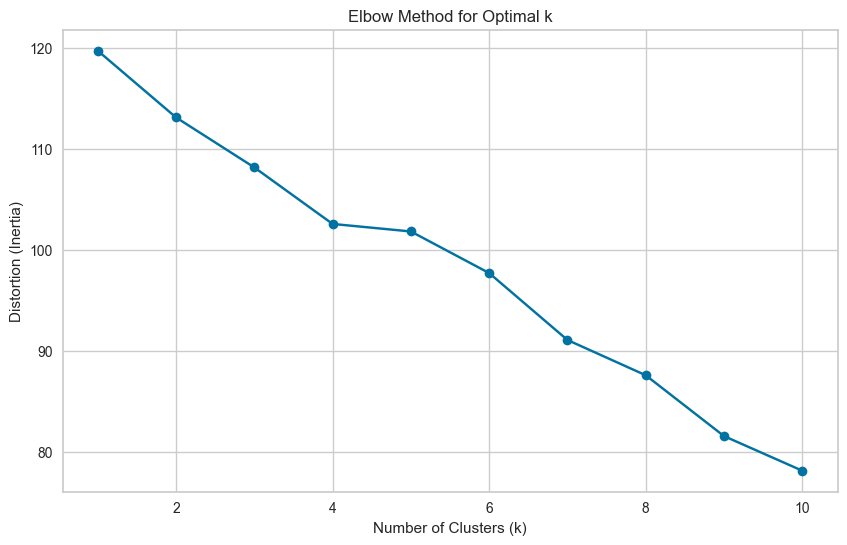

In [57]:
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

job_titles = df['job_title'].unique()

# Create a TfidfVectorizer to convert job titles into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(job_titles)

# Calculate distortions (inertia) for different values of k
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# We then plot the distortions to find the optimal k (Elbow method)
plt.figure(figsize=(10, 6))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.show()


In [58]:

optimal_k = 4  # I've made this variable using the above graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)


clustered_titles = pd.DataFrame({'Job Title': job_titles, 'Cluster': kmeans.labels_})

# We apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# we add them back to the cluster dataframe
clustered_titles['PCA1'] = X_pca[:, 0]
clustered_titles['PCA2'] = X_pca[:, 1]

# Create an interactive scatter plot with plotly
fig = px.scatter(clustered_titles, x='PCA1', y='PCA2', color='Cluster', hover_data=['Job Title'], title='Job Title Clusters',
                 labels={'Cluster': 'Cluster'},
                 template='plotly_white')

# Show the interactive plot
fig.show()

In [59]:
import geopandas as gpd
import folium
from folium import Choropleth, CircleMarker

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_df = pd.merge(world, df, left_on='name', right_on='company_location', how='left')


choropleth_map = folium.Map(location=[0,0], zoom_start=2)

Choropleth(
    geo_data=world,
    name='choropleth',
    data=merged_df,
    columns=['name', 'salary_in_usd'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Salary',
).add_to(choropleth_map)


# a button to toggle the new heatmap layer
folium.LayerControl().add_to(choropleth_map)

choropleth_map


C:\Users\magnu\AppData\Local\Temp\ipykernel_16132\2248944835.py:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



Many places that should be highlighted like the US isnt showing on this map, so lets figure out why

In [60]:
# Using this to display the actual world names that our dataframe should match

print(world['name'].unique()[:10])

# I just limited the output to 10 to examplify what was done, printing the full thing would give a wall of text.
# as you can see below though, the US is written as "United States of America"

['Fiji' 'Tanzania' 'W. Sahara' 'Canada' 'United States of America'
 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea' 'Indonesia' 'Argentina']


It seems the US is defined as "United States of America"rather than just United States as shown on the physical map. And i also will changed the salary to "salary_in_usd" as it only makes sense to compare money in a standardized way. 

In [61]:
import mismatchFinder as mf

worldNames = world['name'].unique()

threshhold = 81

df = mf.find_and_correct_mismatches(worldNames, df, threshhold)

ModuleNotFoundError: No module named 'mismatchFinder'

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from folium import Choropleth

# Assuming 'df' is your DataFrame with salary information
# Group by country and calculate the average salary
avg_salary_by_country = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Load the world GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge GeoDataFrame with average salary information
merged_df = pd.merge(world, avg_salary_by_country, left_on='name', right_on='company_location', how='left')

# Create a choropleth map
choropleth_map = folium.Map(location=[0, 0], zoom_start=2)

Choropleth(
    geo_data=merged_df,
    name='choropleth',
    data=merged_df,
    columns=['company_location', 'salary_in_usd'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Salary in USD',
).add_to(choropleth_map)

# Add a button to toggle the new heatmap layer
folium.LayerControl().add_to(choropleth_map)

choropleth_map


C:\Users\magnu\AppData\Local\Temp\ipykernel_12528\3682838411.py:11: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [ ]:
# Show me the highest salary in Russia and the job title

df[df['company_location'] == 'Russia'][['job_title', 'salary_in_usd']].describe()

,salary_in_usd
count,7.000000
mean,78207.857143
std,74889.345696
min,16455.000000
25%,26500.000000
50%,57000.000000
75%,95500.000000
max,230000.000000


In [ ]:
# TODO

# 1. Discuss some more models to use
# 2. Discuss the training an AI
# 3. What more plots should we use and whats interesting to look at (Tal om strukturen af opgaven, ved ik om det er for meget den måde jeg har gjort det hidtil)
# 4. regressions, clustering (needs a lookat), classification etc.

In [ ]:
top10 = dfOutliers['job_title'].value_counts().head(10) 
top10

top10 = top10.index

top10_df = dfOutliers[dfOutliers['job_title'].isin(top10)]

top10_df = top10_df.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().reset_index()

fig = px.line(top10_df, x='work_year', y='salary_in_usd', color='job_title', title='Average Salary by Job Title Over the Years',
                labels={'work_year': 'Year', 'salary_in_usd': 'Average Salary in USD', 'job_title': 'Job Title'},
                template='plotly_white')

fig.show()

# describe the data over the top 3 most occurant job titles

top3 = dfOutliers['job_title'].value_counts().head(3)

# We extract the relevant 3 top titles and then show their statistics

top3_df = dfOutliers[dfOutliers['job_title'].isin(top3.index)]

top3_df.groupby('job_title')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Analyst,907.0,105978.776185,44672.493881,15000.0,72325.0,101500.0,133000.0,280000.0
Data Engineer,1301.0,143100.221368,60494.462561,17025.0,98432.0,136000.0,182500.0,350000.0
Data Scientist,1238.0,147799.989499,62146.521436,16000.0,104917.5,144000.0,187000.0,350000.0


In [ ]:
import regressScript as rs

rs.plot_multilinear_regression(df, 'Data Analyst')


AttributeError: module 'regressScript' has no attribute 'plot_multilinear_regression'

In [ ]:
from sklearn.linear_model import LinearRegression

filtered_df = dfNumeric[dfNumeric["job_title_Data Scientist"] > 0.5]

X = filtered_df["work_year"].values.reshape(-1, 1)
y = filtered_df['salary_in_usd'].values

model = LinearRegression().fit(X, y)

r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

In [ ]:
# print amount of cols
corr = dfNumeric.corr()

corr["salary_in_usd"].abs().sort_values(ascending=False)

In [ ]:
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


dfClassification = dfNumeric.copy()

rowCluster = pd.read_csv("data/cluster.csv")
dfClassification['cluster'] = rowCluster['cluster']

X = dfClassification.drop(['salary_in_usd'], axis=1)
y = dfClassification['salary_in_usd']

random_states_to_try = range(1, 150)  

best_r2 = -1  # 
best_random_state = None  # start values

for random_state in random_states_to_try:
    print(f'new randomstate is {random_state}')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state) # 88

    # classification = DecisionTreeClassifier()
    # classification = RandomForestClassifier()
    classification = RandomForestClassifier(random_state=42) # 10
    classification.fit(X_train, y_train)

    pred = classification.predict(X_test)

    score = classification.score(X_test, y_test)

    if score > best_r2:
        best_r2 = score
        best_random_state = random_state
        print(f'New best score: {best_r2} (Random State: {best_random_state})')

print(f'Best Random State: {best_random_state}')
print(f'Best score: {best_r2}')


new randomstate is 1
New best score: 0.0022727272727272726 (Random State: 1)
new randomstate is 2
New best score: 0.005303030303030303 (Random State: 2)
new randomstate is 3
new randomstate is 4
new randomstate is 5
new randomstate is 6
New best score: 0.007575757575757576 (Random State: 6)
new randomstate is 7
new randomstate is 8
new randomstate is 9
new randomstate is 10
New best score: 0.00909090909090909 (Random State: 10)
new randomstate is 11
new randomstate is 12
new randomstate is 13
new randomstate is 14
new randomstate is 15
new randomstate is 16
new randomstate is 17
new randomstate is 18
new randomstate is 19
new randomstate is 20
new randomstate is 21
new randomstate is 22
new randomstate is 23
new randomstate is 24
new randomstate is 25
new randomstate is 26
new randomstate is 27
new randomstate is 28
new randomstate is 29
new randomstate is 30
new randomstate is 31
new randomstate is 32
new randomstate is 33
new randomstate is 34
new randomstate is 35
new randomstate is

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# change from and to to try out different "seeds"
random_states_to_try = range(1, 150)  

best_r2 = -1  # 
best_random_state = None  # start values

for random_state in random_states_to_try:
    print(f'new randomstate is {random_state}')
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    rf_regressor = RandomForestRegressor(n_estimators=50, random_state=42)

    # Fit the model to the training data
    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    if r2 > best_r2:
        best_r2 = r2
        best_random_state = random_state
        print(f'New best R-squared: {best_r2:.2f} (Random State: {best_random_state})')

print(f'Best Random State: {best_random_state}')
print(f'Best R-squared: {best_r2:.2f}')
